In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import env
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

from math import sqrt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#feature selection
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


<h1>Modeling exercise<h1/>

<h2>Select a dataset with a continuous target variable.

<h2/>

In [2]:
# Continuous target variable is Tax_value_dollars
from wrangle import wrangle_zillow
df = wrangle_zillow()
df.head() 

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
2,0,0.0,73026.0,1434941.0,1959,20800.37,6037.0
3,0,0.0,5068.0,1174475.0,1948,14557.57,6037.0
4,0,0.0,1776.0,440101.0,1947,5725.17,6037.0
5,0,0.0,2400.0,287634.0,1943,3661.28,6037.0
7,0,0.0,3611.0,698984.0,1946,7857.84,6037.0


<h2>Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

<h2/>

In [3]:
df.head() 

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
2,0,0.0,73026.0,1434941.0,1959,20800.37,6037.0
3,0,0.0,5068.0,1174475.0,1948,14557.57,6037.0
4,0,0.0,1776.0,440101.0,1947,5725.17,6037.0
5,0,0.0,2400.0,287634.0,1943,3661.28,6037.0
7,0,0.0,3611.0,698984.0,1946,7857.84,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901918 entries, 2 to 2982283
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Bedroom_Count      int64  
 1   Bathroom_Count     float64
 2   Finished_sqft      float64
 3   Tax_value_dollars  float64
 4   Year_built         int64  
 5   Tax_amount         float64
 6   fips               float64
dtypes: float64(5), int64(2)
memory usage: 177.1 MB


In [5]:
df.isna().sum()

Bedroom_Count        0
Bathroom_Count       0
Finished_sqft        0
Tax_value_dollars    0
Year_built           0
Tax_amount           0
fips                 0
dtype: int64

In [6]:
from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)
train.shape, validate.shape, test.shape

((1625073, 7), (696461, 7), (580384, 7))

In [7]:
train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0


In [8]:
from wrangle import scale_data
train, validate, test = scale_data(train, validate, test)

In [9]:
train.columns, validate.columns, test.columns

(Index(['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars',
        'Year_built', 'Tax_amount', 'fips', 'Bedroom_Count_Scaled',
        'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_amount_Scaled'],
       dtype='object'),
 Index(['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars',
        'Year_built', 'Tax_amount', 'fips', 'Bedroom_Count_Scaled',
        'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_amount_Scaled'],
       dtype='object'),
 Index(['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars',
        'Year_built', 'Tax_amount', 'fips', 'Bedroom_Count_Scaled',
        'Bathroom_Count_Scaled', 'Finished_sqft_Scaled', 'Tax_amount_Scaled'],
       dtype='object'))

In [10]:
train = train.drop(columns= ['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft','Tax_amount'])
validate = validate.drop(columns= ['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft','Tax_amount'])
test = test.drop(columns= ['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft','Tax_amount'])

In [11]:
train.head()

,Tax_value_dollars,Year_built,fips,Bedroom_Count_Scaled,Bathroom_Count_Scaled,Finished_sqft_Scaled,Tax_amount_Scaled
515265,347987.0,1955,6037.0,0.12,0.06250,0.001456,0.001242
2834387,705314.0,1975,6111.0,0.20,0.09375,0.002545,0.002483
282747,389612.0,2005,6037.0,0.04,0.03125,0.001154,0.001553
1087577,367965.0,2002,6037.0,0.08,0.06250,0.001274,0.001371
1663081,333600.0,1950,6037.0,0.16,0.06250,0.001789,0.001442


<h2>Time to Model!<h2/>
    
<h3/>Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.<h3/>



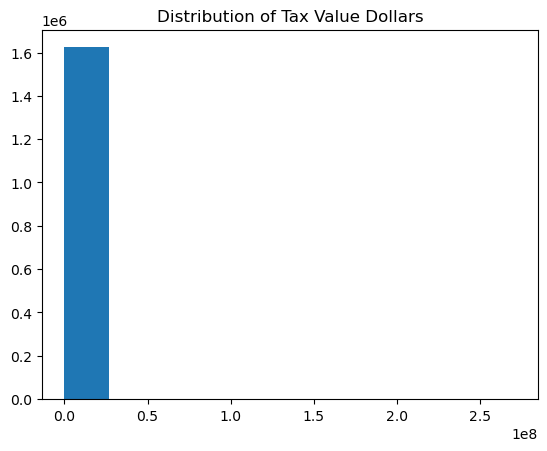

In [12]:
plt.hist(train['Tax_value_dollars'])
plt.title('Distribution of Tax Value Dollars')
plt.show()

In [13]:
#Let's split up the train data between X and y
X = train.drop(columns={'Tax_value_dollars'})
y = train['Tax_value_dollars']

In [14]:
from sklearn.linear_model import LinearRegression

#make
lm = LinearRegression()
#fit
lm.fit(X,y)
#use
yhat = lm.predict(X)

In [15]:
#Which method is best for the baseline?
baseline_mean = y.mean()
baseline_med = y.median()
baseline_mean, baseline_med

(444677.12465224636, 324441.0)

In [16]:
y_pred = pd.DataFrame(
    {
    'y_act': y.values,
    'yhat' : yhat,
    'baseline_med': baseline_med,
    'baseline_mean': baseline_mean
    }, index=train.index)

In [17]:
# compute the error on these two baselines: I want the lower RSME for the baseline
mean_baseline_rmse = mean_squared_error(y_pred.baseline_mean, y) ** (1/2)
med_baseline_rmse = mean_squared_error(y_pred.baseline_med, y) ** (1/2)
mean_baseline_rmse < med_baseline_rmse

True

In [18]:
#Establish the true baseline
baseline = mean_baseline_rmse

<h3>Evaluate<h3/>

In [19]:
def evaluate_reg(y, yhat):
    '''
    based on two series, y_act, y_pred, (y, yhat), we
    evaluate and return the root mean squared error
    as well as the explained variance for the data.
    
    returns: rmse (float), rmse (float)
    '''
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [20]:
y.shape

(1625073,)

In [21]:
# make sure that we have a baseline guess
# that is the same shape as our y variable:
# np.repeat does what it sounds like
baseline_array = np.repeat(baseline, y.shape[0])

In [22]:
baseline_rsme, baseline_r2 = evaluate_reg(y, baseline_array)

<h3>Create a dataframe to compare the models<h3/>

In [23]:
eval_df = pd.DataFrame([{
    'model': 'baseline',
    'rmse': baseline_rsme,
    'r2': baseline_r2
}])

In [24]:
eval_df

,model,rmse,r2
0,baseline,775618.398206,-0.148645


<h3>------------------------------Ordinary Least Squares (OLS)------------------------------<h3/>

In [25]:
#IMPORT
from sklearn.feature_selection import RFE

<h4>Simple Linear Regression + RFE<h4/>

In [26]:
# first ML model
lr1 = LinearRegression()

# create the thing
rfe = RFE(lr1, n_features_to_select = 3)

# fit the thing
rfe.fit(X, y)

# use it/transform your X_train & validate data splits
X_train_rfe = rfe.transform(X)

X_val_rfe = rfe.transform(validate.drop(columns = ['Tax_value_dollars']))

In [27]:
X_train_rfe

array([[0.0625    , 0.00145605, 0.0012416 ],
       [0.09375   , 0.00254468, 0.00248262],
       [0.03125   , 0.00115371, 0.0015534 ],
       ...,
       [0.078125  , 0.00204603, 0.00107237],
       [0.03125   , 0.00098155, 0.00049394],
       [0.078125  , 0.00176889, 0.00206121]])

In [28]:
# What features got selected for predicting Tax_value dollars (also known as Home Value)??
rfe.get_feature_names_out()

array(['Bathroom_Count_Scaled', 'Finished_sqft_Scaled',
       'Tax_amount_Scaled'], dtype=object)

In [29]:
#Creating a X and y for validate and test

X_val, y_val = validate.drop(columns=['Tax_value_dollars']), validate['Tax_value_dollars']
X_test, y_test = test.drop(columns=['Tax_value_dollars']), test['Tax_value_dollars']

In [30]:
lr1

LinearRegression()

In [31]:
lr1.fit(X_train_rfe, y)

LinearRegression()

In [32]:
y_pred_val = lr1.predict(X_val_rfe)

In [33]:
evaluate_reg(y, lr1.predict(X_train_rfe))

(171760.37890782804, 0.9436705190590959)

In [34]:
eval_df.columns

Index(['model', 'rmse', 'r2'], dtype='object')

In [35]:
rmse, r_2 = evaluate_reg(y, lr1.predict(X_train_rfe))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ols_rfe_1',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [36]:
eval_df

,model,rmse,r2
0,baseline,775618.398206,-0.148645
1,ols_rfe_1,171760.378908,0.943671


In [37]:
lr1.coef_

array([6.07139134e+05, 1.07784136e+05, 2.60379901e+08])

In [38]:
lr1.intercept_

-31640.37311124074

In [39]:
#For Variable 1:
print(f'For every 1 point increase in "Bedroom Count", we predict a {lr1.coef_[0]:.2f} point increase or decrease in Home Value')
#For Variable 2:
print(f'For every 1 point increase in "Bathroom Count", we predict a {lr1.coef_[1]:.2f} point increase or decrease in Home Value')
#For Variable 3:
print(f'For every 1 point increase in "Year Built", we predict a {lr1.coef_[2]:.2f} point increase or decrease in Home Value')


For every 1 point increase in "Bedroom Count", we predict a 607139.13 point increase or decrease in Home Value
For every 1 point increase in "Bathroom Count", we predict a 107784.14 point increase or decrease in Home Value
For every 1 point increase in "Year Built", we predict a 260379900.50 point increase or decrease in Home Value


In [40]:
val_rmse, val_r2 = evaluate_reg(y_val, lr1.predict(X_val_rfe))
val_dict = {
    'model': 'ols_rfe_1',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [41]:
val_scores = [val_dict]

<h3>------------------------------Multiple Regression------------------------------<h3/>

In [42]:
# same process here, we are just changing the number of features that we are using in selecting our outcome in OLS

lr2 = LinearRegression()

# fit it:
lr2.fit(X, y)

# use it:

LinearRegression()

In [43]:
rmse, r_2 = evaluate_reg(y, lr2.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'Multiple Regression - All Features',
        'rmse': rmse,
        'r2': r_2
        
    }
])], ignore_index=True, axis=0)

In [44]:
val_rmse, val_r2 = evaluate_reg(y_val, lr2.predict(X_val))
val_dict = {
    'model': 'Multiple Regression - All Features',
    'rmse': val_rmse,
    'r2': val_r2
}
val_scores.append(val_dict)

In [45]:
eval_df

,model,rmse,r2
0,baseline,775618.398206,-0.148645
1,ols_rfe_1,171760.378908,0.943671
2,Multiple Regression - All Features,170903.298069,0.944231


<h3>------------------------------LassoLars------------------------------<h3/>

In [46]:
from sklearn.linear_model import LassoLars

In [47]:
#Make the thing
lasso = LassoLars(alpha=1)

#Fit the thing
lasso = lasso.fit(X, y)

In [48]:
lasso.coef_

array([-2.96806459e+02,  7.75153058e+02, -2.80120228e+05,  9.65876083e+05,
        1.89811280e+05,  2.59934338e+08])

In [49]:
lr2.coef_

array([-2.97915676e+02,  7.75262954e+02, -2.82012036e+05,  9.62135316e+05,
        4.44026804e+05,  2.59985862e+08])

In [50]:
rmse, r_2 = evaluate_reg(y, lasso.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'lasso',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [51]:
val_rmse, val_r2 = evaluate_reg(y_val, lasso.predict(X_val))
val_dict = {
    'model': 'lasso',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [52]:
val_scores.append(val_dict)

In [53]:
eval_df

,model,rmse,r2
0,baseline,775618.398206,-0.148645
1,ols_rfe_1,171760.378908,0.943671
2,Multiple Regression - All Features,170903.298069,0.944231
3,lasso,170904.187141,0.944231


<h3>------------------------------Polynomial Regression------------------------------<h3/>

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
#Make the thing
pf = PolynomialFeatures(degree=2)

#fit the thing and USE it on train
x_train_sq = pf.fit_transform(X)

#Use the thing on Val and Test
x_val_sq = pf.transform(X_val)
x_test_sq = pf.transform(X_test)

In [56]:
# Make a new model for our polynomial regressor:

plyreg = LinearRegression()
plyreg.fit(x_train_sq, y)

LinearRegression()

In [57]:
#Evaluate

rmse, r_2 = evaluate_reg(y, plyreg.predict(x_train_sq))
eval_df = pd.concat([eval_df, pd.DataFrame(
[{
    'model': 'quad_reg',
    'rmse': rmse,
    'r2': r_2
}

]
)], ignore_index=True, axis=0 )

In [58]:
val_rmse, val_r2 = evaluate_reg(y_val, plyreg.predict(x_val_sq))
val_dict = {
    'model': 'quad_reg',
    'rmse': val_rmse,
    'r2': val_r2
}

In [59]:
val_scores.append(val_dict)

In [60]:
eval_df

,model,rmse,r2
0,baseline,775618.398206,-0.148645
1,ols_rfe_1,171760.378908,0.943671
2,Multiple Regression - All Features,170903.298069,0.944231
3,lasso,170904.187141,0.944231
4,quad_reg,153872.614327,0.954792


<h3>------------------------------Generalized Linear Model (GLM)------------------------------<h3/>

In [61]:
from sklearn.linear_model import TweedieRegressor

In [62]:
# Make the thing
gams = TweedieRegressor(power = 0)
# Fit the thing
gams.fit(X, y)

TweedieRegressor(power=0)

In [63]:
#Use the thing
rmse, r_2 = evaluate_reg(y, gams.predict(X))

eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'gamma_ols',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index = True, axis=0)

In [64]:
val_rmse, val_r2 = evaluate_reg(y_val, gams.predict(X_val))

val_dict = {
    'model': 'gamma_ols',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [65]:
val_scores.append(val_dict)

In [66]:
eval_df

,model,rmse,r2
0,baseline,775618.398206,-0.148645
1,ols_rfe_1,171760.378908,0.943671
2,Multiple Regression - All Features,170903.298069,0.944231
3,lasso,170904.187141,0.944231
4,quad_reg,153872.614327,0.954792
5,gamma_ols,716940.237138,0.018578


<h1>Evaluate the final model on the Test data<h1/>

In [67]:
# The model I selected was quad_reg 'Polynomial Regression'

In [68]:
test_rmse, test_r2 = evaluate_reg(y_test, plyreg.predict(x_test_sq))
test_dict = {
    'model': 'quad_reg_test',
    'rmse': test_rmse,
    'r2': test_r2
}

In [69]:
val_scores.append(test_dict)

In [70]:
eval_df

,model,rmse,r2
0,baseline,775618.398206,-0.148645
1,ols_rfe_1,171760.378908,0.943671
2,Multiple Regression - All Features,170903.298069,0.944231
3,lasso,170904.187141,0.944231
4,quad_reg,153872.614327,0.954792
5,gamma_ols,716940.237138,0.018578


In [71]:
test_dict

{'model': 'quad_reg_test',
 'rmse': 124374.57473611497,
 'r2': 0.9750176516849914}